In [1]:
import sys
import os

# Get the current working directory (notebook location)
current_dir = os.getcwd()

# Move up to the parent directory (project root)
root_dir = os.path.abspath(os.path.join(current_dir, '..'))

# Add the MNIST directory to the path
sys.path.append(os.path.join(root_dir, 'MNIST'))

print("Current Directory:", current_dir)
print("Root Directory:", root_dir)


Current Directory: /home/harikrishnam/dv/the_project/zero0.3/MNIST
Root Directory: /home/harikrishnam/dv/the_project/zero0.3


In [2]:
from MnistHelperFunctions.get_standard_data import preprocessed_mnist

inside getting data


In [3]:
train_data, test_data = preprocessed_mnist()

inside getting data3
inside getting data2


Data format: 
--------------------------------
type(train_data.data[0]) -> <class 'torch.Tensor'>
train_data.data[0].dtype -> torch.float32

type(train_data.targets) -> <class 'torch.Tensor'>
train_data.targets.dtype -> torch.int64


Access Data by indexing
--------------------------------
train_data[0] -> (torch.Size([28, 28]), torch.Size([]))


max and min values of train_data.data:
--------------------------------
	[(tensor(0.), tensor(1.))]





In [4]:
BATCH_SIZE = 256

In [5]:
from ZeroHelperFunctions.DataLoadersForZero import DataLoadersForZero

dl = DataLoadersForZero(train_data=train_data,
                        test_data=test_data,
                        image_shape=(1, 28, 28))

In [6]:
dl.make_dataloaders(batch_size=BATCH_SIZE, 
                    n_train_zeros=0, 
                    n_test_zeros=0,
                    label_for_zero=10)

shape of image of data:  torch.Size([28, 28])
shape of image of zero:  torch.Size([28, 28])


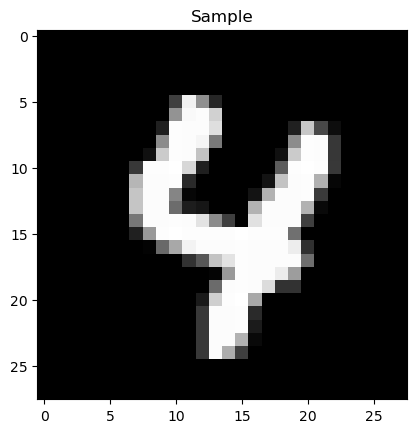

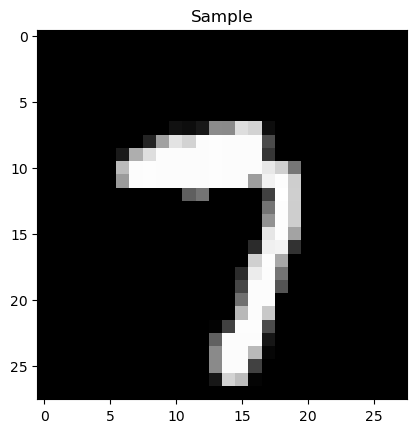

In [7]:
dl.show_border_images_of_combined_data(50000)

In [8]:
dl.generate_zero_class_dataloader(100_000, BATCH_SIZE)

In [9]:
dl.check_dataloader(dl.zero_dataloader)
dl.check_dataloader(dl.train0_dataloader)
dl.check_dataloader(dl.train_dataloader)
dl.check_dataloader(dl.test_dataloader)
dl.check_dataloader(dl.test0_dataloader)

torch.Size([256, 28, 28]) torch.float32 torch.Size([256]) torch.int64
torch.Size([256, 28, 28]) torch.float32 torch.Size([256]) torch.int64
torch.Size([256, 28, 28]) torch.float32 torch.Size([256]) torch.int64
torch.Size([256, 28, 28]) torch.float32 torch.Size([256]) torch.int64
torch.Size([256, 28, 28]) torch.float32 torch.Size([256]) torch.int64
torch.Size([256, 28, 28]) torch.float32 torch.Size([256]) torch.int64
torch.Size([256, 28, 28]) torch.float32 torch.Size([256]) torch.int64
torch.Size([256, 28, 28]) torch.float32 torch.Size([256]) torch.int64
torch.Size([256, 28, 28]) torch.float32 torch.Size([256]) torch.int64
torch.Size([256, 28, 28]) torch.float32 torch.Size([256]) torch.int64
torch.Size([256, 28, 28]) torch.float32 torch.Size([256]) torch.int64
torch.Size([256, 28, 28]) torch.float32 torch.Size([256]) torch.int64
torch.Size([256, 28, 28]) torch.float32 torch.Size([256]) torch.int64
torch.Size([256, 28, 28]) torch.float32 torch.Size([256]) torch.int64
torch.Size([256, 28,

In [10]:
dl.describe_train_data()


train_data.data and test_data.data:
shapes:  torch.Size([60000, 28, 28]) torch.Size([10000, 28, 28])
types:  <class 'torch.Tensor'> <class 'torch.Tensor'>
dtype:  torch.float32 torch.float32

train_data.targets and test_data.targets:
shapes:  torch.Size([60000]) torch.Size([10000])
types:  <class 'torch.Tensor'> <class 'torch.Tensor'>
dtype:  torch.int64 torch.int64


In [11]:
dl.describe_zero_class_data()


zero_class_data_for_train.data:
shapes:  torch.Size([0, 28, 28])
types:  <class 'torch.Tensor'>
dtype:  torch.float32

zero_class_data_for_train.targets:
shapes:  torch.Size([0])
types:  <class 'torch.Tensor'>
dtype:  torch.int64


zero_class_data_for_test.data:
shapes:  torch.Size([0, 28, 28])
types:  <class 'torch.Tensor'>
dtype:  torch.float32

zero_class_data_for_test.targets:
shapes:  torch.Size([0])
types:  <class 'torch.Tensor'>
dtype:  torch.int64


In [12]:
from ZeroHelperFunctions.zeroTrainer import ZeroTrainer
from Networks.networks import FullyConnectedNet

In [13]:
NUM_DIMENSIONS = 28*28
NUM_EPOCHS = 200
learning_rate = 0.01

simple_model = FullyConnectedNet(input_dim=NUM_DIMENSIONS,
                    layer1_dim=NUM_DIMENSIONS * 10,
                    layer2_dim=NUM_DIMENSIONS * 5,
                    layer3_dim=11*10,
                    num_classes=10)

In [14]:
# Import PyTorch
import torch
from torch import nn

zero_trainer = ZeroTrainer(model=simple_model,
                        number_of_non_zero_classes=10,
                        train_dl=dl.train_dataloader,
                        test_dl=dl.test_dataloader,
                        purity_fact_dl=dl.test0_dataloader,
                        zero_dl=dl.zero_dataloader,
                        loss_fn=nn.CrossEntropyLoss(),
                        optimizer=torch.optim.SGD(params=simple_model.parameters(), lr=learning_rate, weight_decay=0.001),
                        label_of_zero_class=10,
                        device="cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
zero_trainer.train(epochs=NUM_EPOCHS)

Training...(epochs: 200)
Epoch: 0
----------------
Epoch: 1
----------------
Epoch: 2
----------------
Epoch: 3
----------------
Epoch: 4
----------------
Epoch: 5
----------------
Epoch: 6
----------------
Epoch: 7
----------------
Epoch: 8
----------------
Epoch: 9
----------------
Epoch: 10
----------------
Epoch: 11
----------------
Epoch: 12
----------------
Epoch: 13
----------------
Epoch: 14
----------------
Epoch: 15
----------------
Epoch: 16
----------------
Epoch: 17
----------------
Epoch: 18
----------------
Epoch: 19
----------------
Epoch: 20
----------------
Epoch: 21
----------------
Epoch: 22
----------------
Epoch: 23
----------------
Epoch: 24
----------------
Epoch: 25
----------------
Epoch: 26
----------------
Epoch: 27
----------------
Epoch: 28
----------------
Epoch: 29
----------------
Epoch: 30
----------------
Epoch: 31
----------------
Epoch: 32
----------------
Epoch: 33
----------------
Epoch: 34
----------------
Epoch: 35
----------------
Epoch: 36
---

In [36]:
from ZeroHelperFunctions import plots

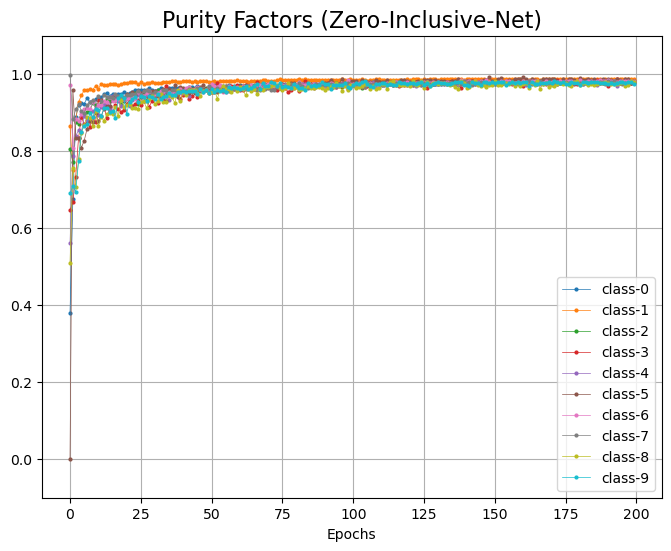

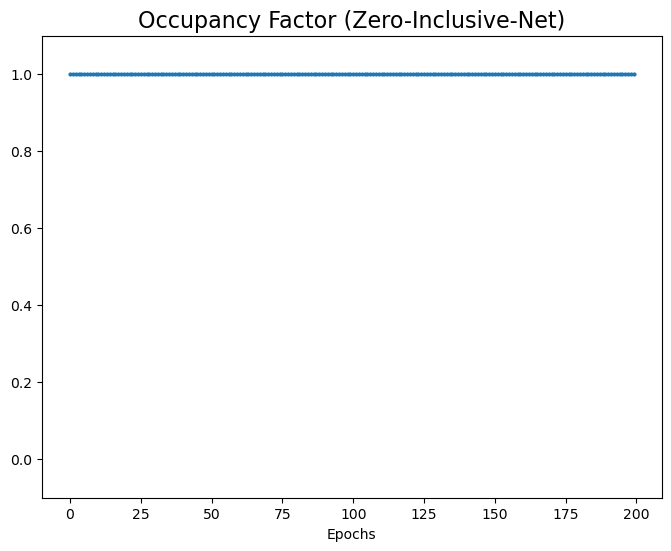

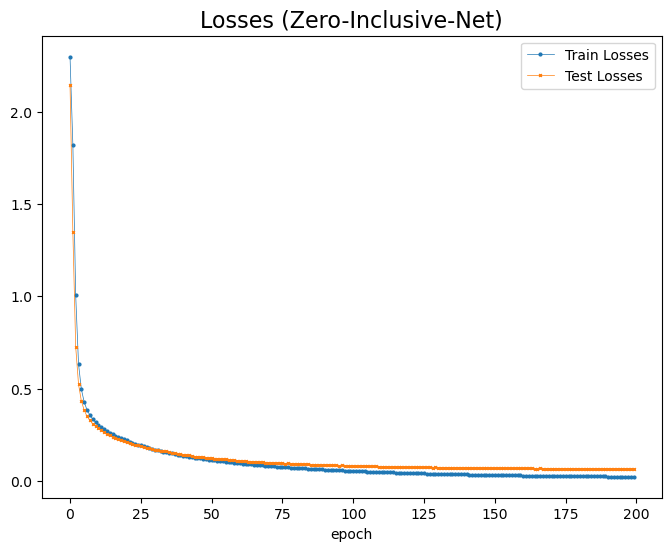

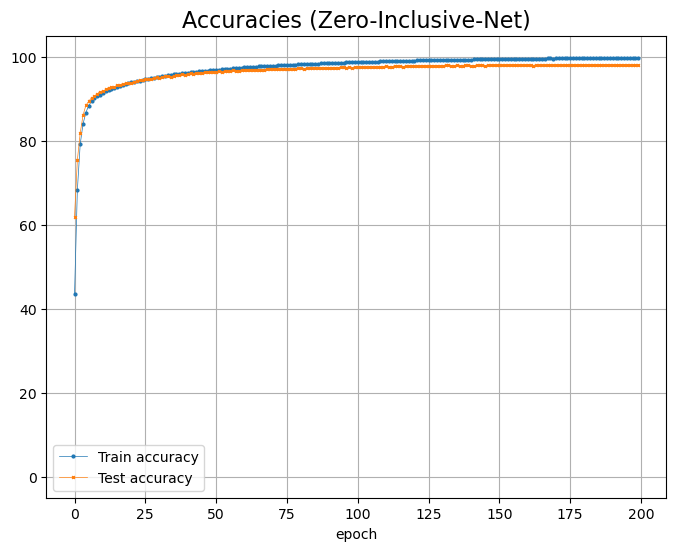

In [37]:
plots.plot_pf(zero_trainer.purities, title="Zero-Inclusive-Net")
plots.plot_of(zero_trainer.occupancy, title="Zero-Inclusive-Net")
plots.plot_train_test_losses(zero_trainer.train_loss,
                             zero_trainer.test_loss, title="Zero-Inclusive-Net")
plots.plot_train_test_accs(zero_trainer.train_acc,
                           zero_trainer.test_acc, title="Zero-Inclusive-Net")

In [38]:
from ZeroHelperFunctions.SaveLoadModels import save_model, load_model

In [39]:
# save_model(the_model=zero_model, model_name="mnist_full.pth")

saving model to: models/mnist_full.pth


In [40]:
data, labels = next(iter(dl.zero_dataloader))

In [41]:
data[0].shape, labels[0]

(torch.Size([28, 28]), tensor(10))

In [42]:
from ZeroHelperFunctions.show_image import show_one_grayscale_image

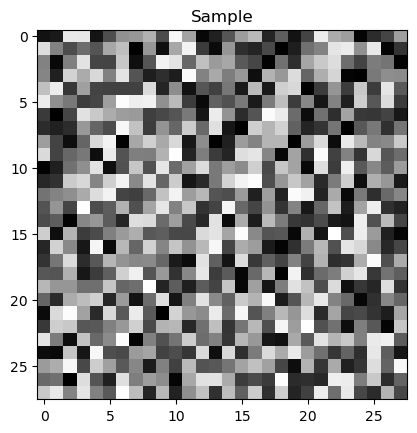

In [43]:
show_one_grayscale_image(data[0])

In [44]:
xk = data[0].unsqueeze(0)
def generate(starting_noise, class_name, step_size, iterations=100, print_freq=10):
    xk = starting_noise
    xk = xk.clone().detach().requires_grad_(True) 
    xk.shape, xk.requires_grad
    zero_model.eval()
    logits = zero_model(xk.to("cuda" if torch.cuda.is_available() else "cpu"))
    target_logit = logits[:, class_name]
    target_logit
    target_logit.backward()
    gradients = xk.grad
    xk = xk + gradients * step_size
    xk[0].shape
    show_one_grayscale_image(xk[0].detach().cpu().numpy())
    for i in range(iterations):
        xk = xk.clone().detach().requires_grad_(True) 
        xk.shape, xk.requires_grad
        zero_model.eval()
        logits = zero_model(xk.to("cuda" if torch.cuda.is_available() else "cpu"))
        target_logit = logits[:, class_name]
        target_logit
        target_logit.backward()
        gradients = xk.grad
        xk = xk + gradients * step_size
        xk[0].shape
        if i % print_freq == 0:
            print("iteration number: ", i)
            show_one_grayscale_image(xk[0].detach().cpu().numpy())

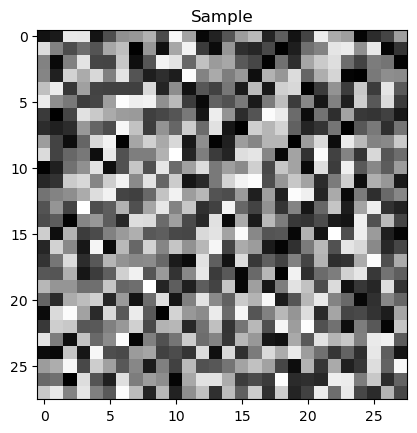

iteration number:  0


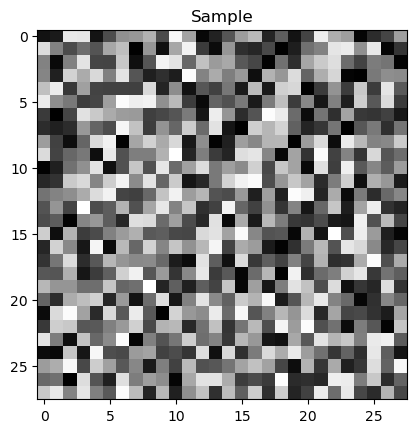

iteration number:  500


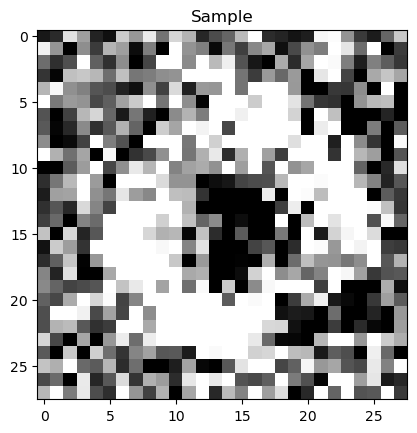

iteration number:  1000


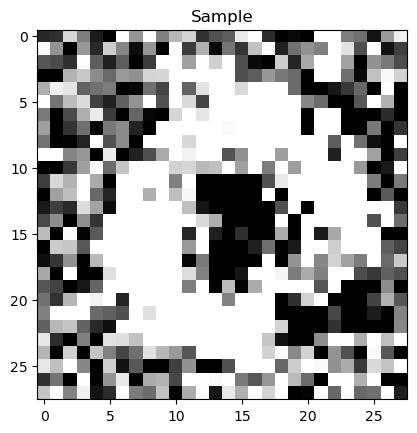

iteration number:  1500


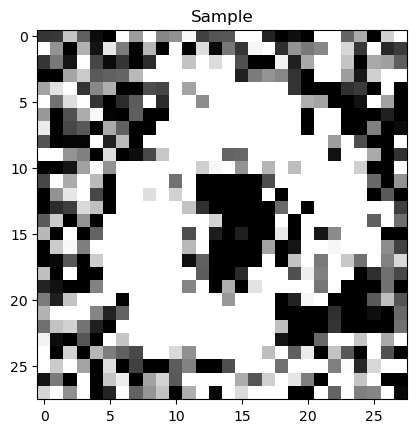

iteration number:  2000


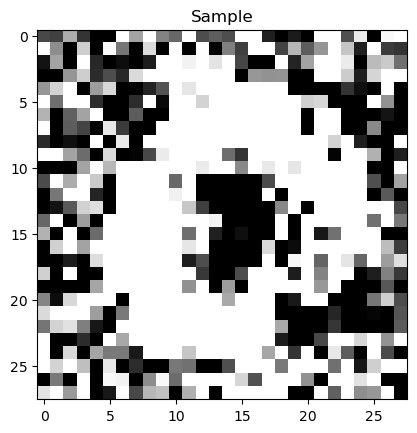

iteration number:  2500


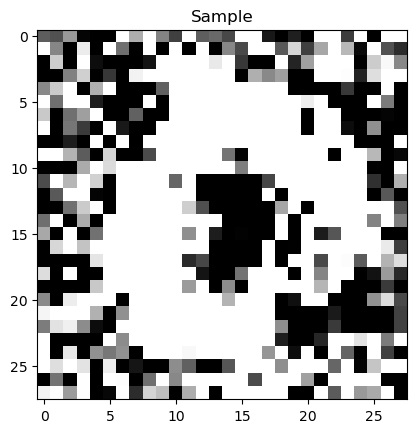

iteration number:  3000


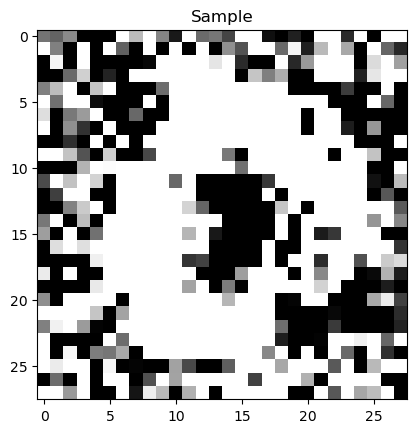

In [45]:
generate(starting_noise=data[0].unsqueeze(0), 
         class_name=0, 
         step_size=0.01, 
         iterations=3001, 
         print_freq=500)

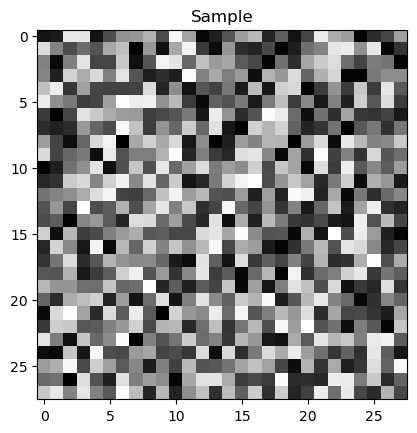

iteration number:  0


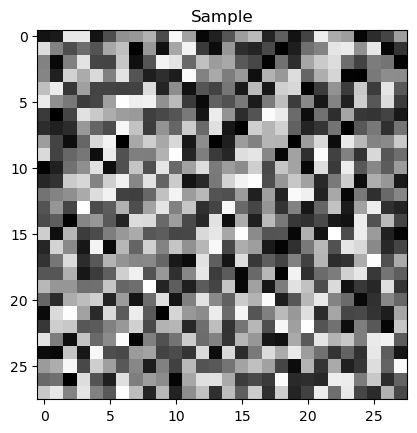

iteration number:  500


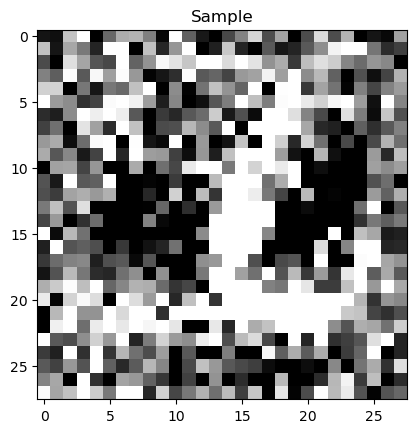

iteration number:  1000


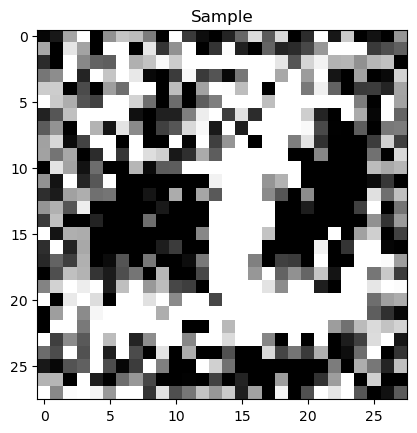

iteration number:  1500


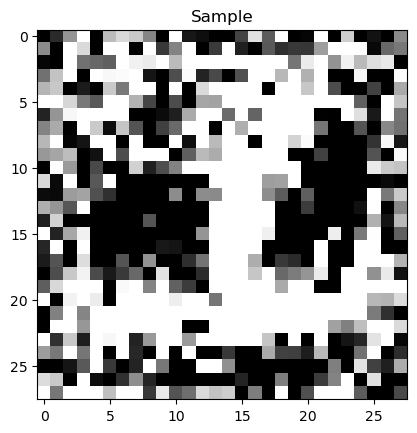

iteration number:  2000


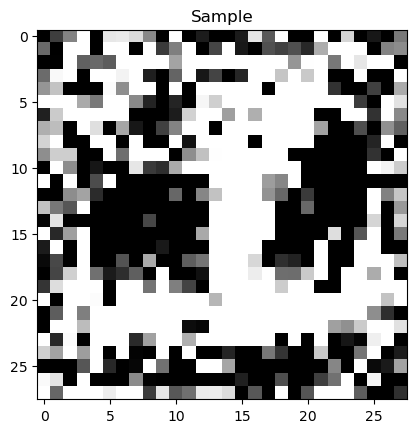

iteration number:  2500


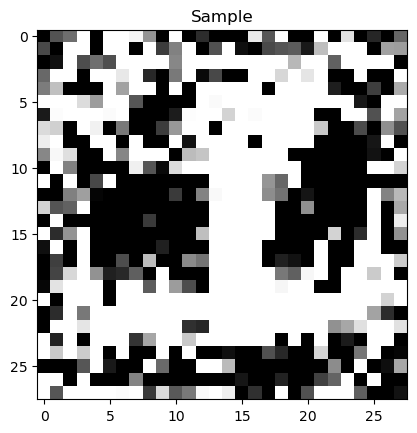

iteration number:  3000


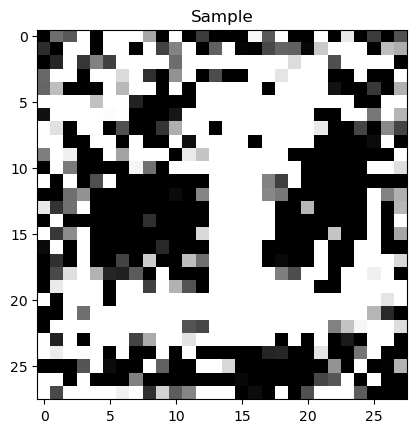

In [46]:
generate(starting_noise=data[0].unsqueeze(0), 
         class_name=1, 
         step_size=0.01, 
         iterations=3001, 
         print_freq=500)

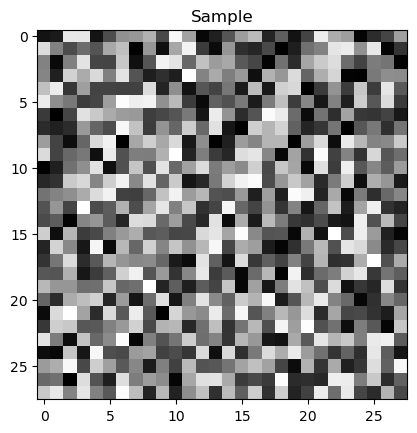

iteration number:  0


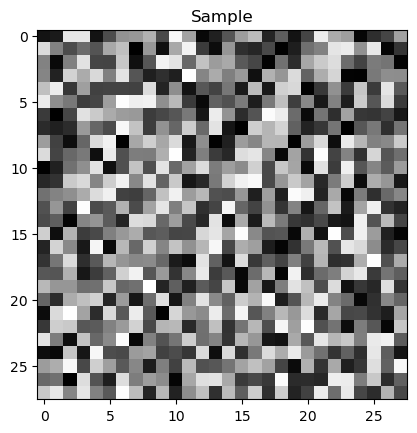

iteration number:  500


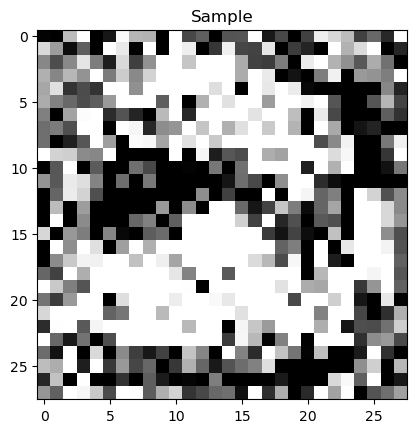

iteration number:  1000


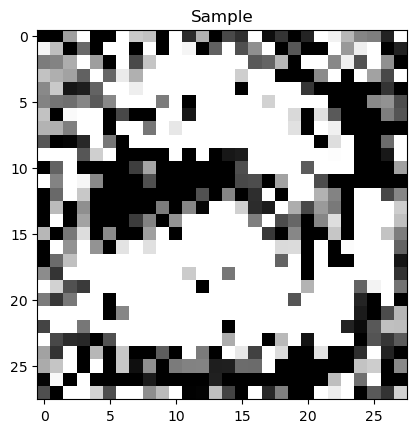

iteration number:  1500


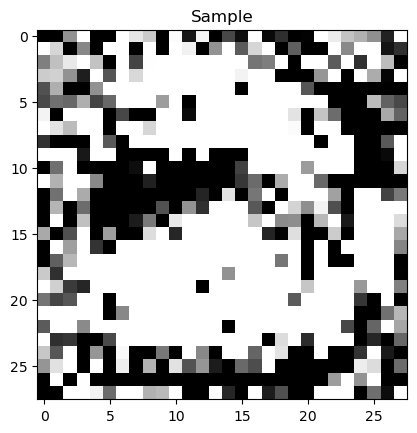

iteration number:  2000


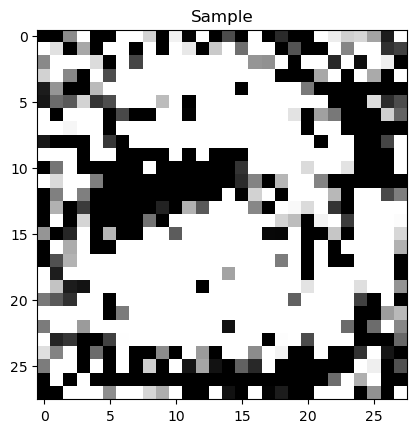

iteration number:  2500


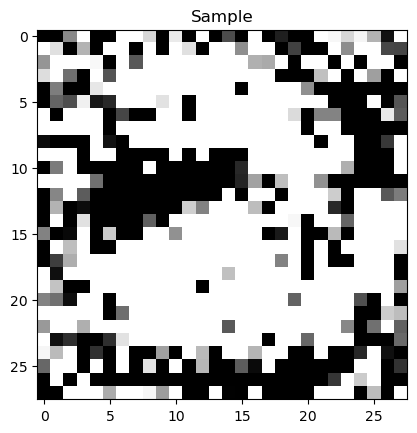

iteration number:  3000


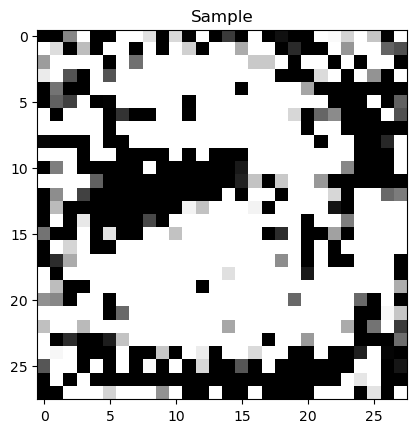

In [47]:
generate(starting_noise=data[0].unsqueeze(0), 
         class_name=2, 
         step_size=0.01, 
         iterations=3001, 
         print_freq=500)

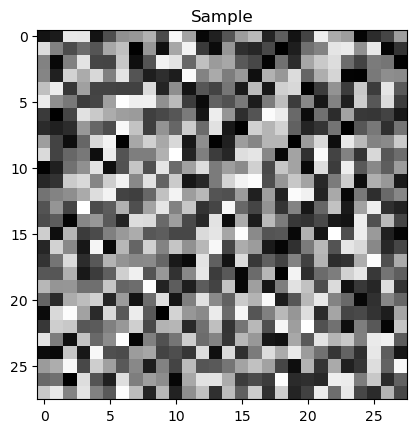

iteration number:  0


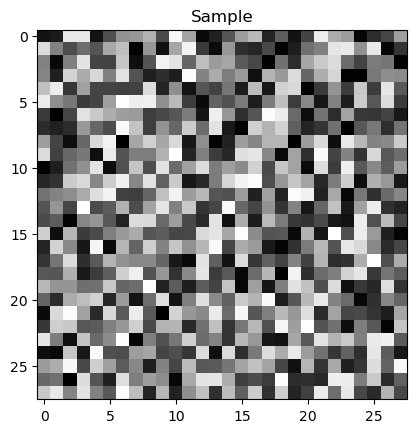

iteration number:  500


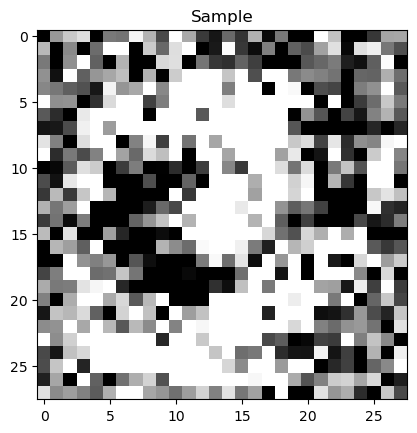

iteration number:  1000


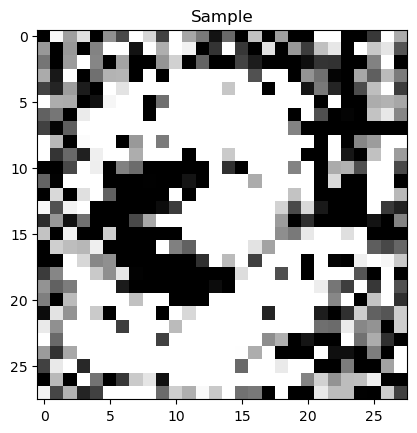

iteration number:  1500


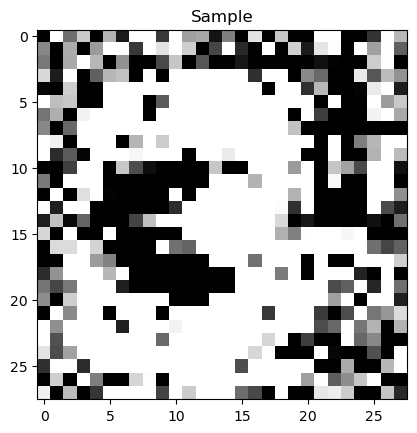

iteration number:  2000


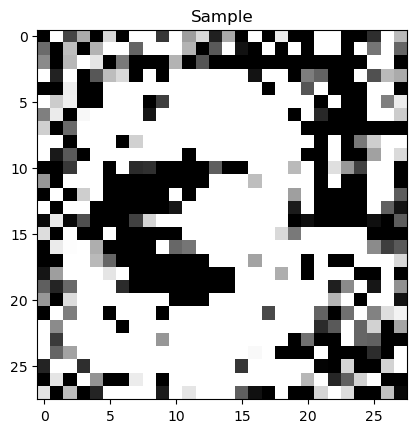

iteration number:  2500


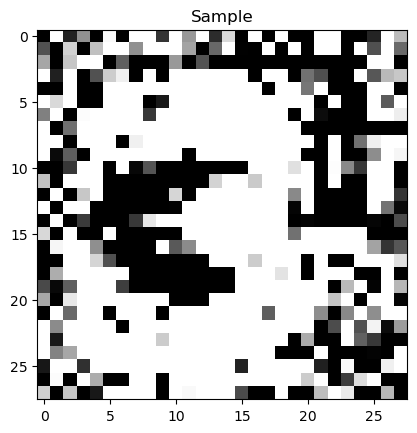

iteration number:  3000


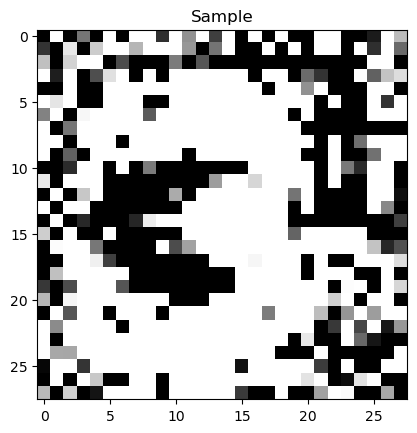

In [48]:
generate(starting_noise=data[0].unsqueeze(0), 
         class_name=3, 
         step_size=0.01, 
         iterations=3001, 
         print_freq=500)

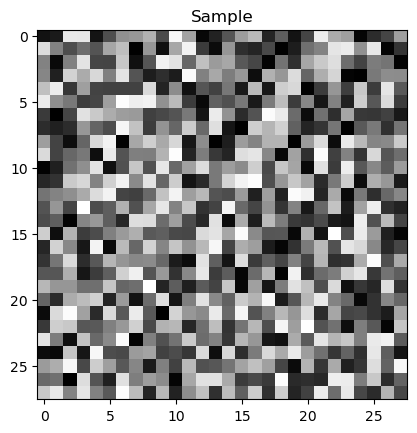

iteration number:  0


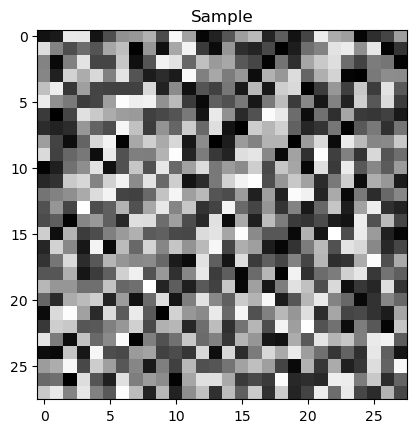

iteration number:  500


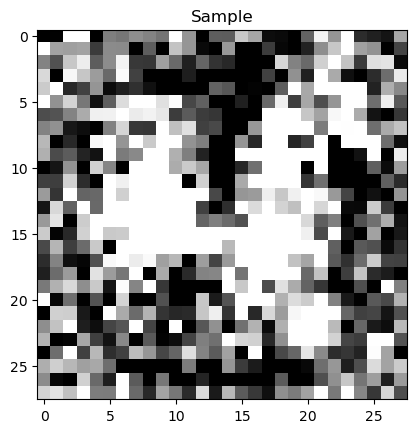

iteration number:  1000


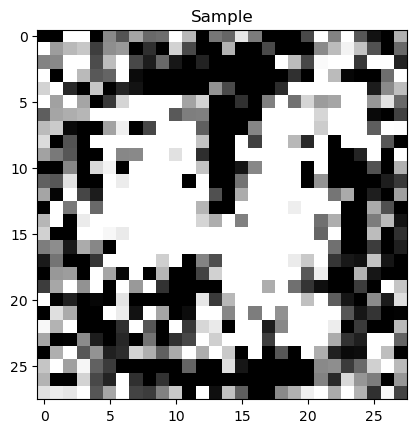

iteration number:  1500


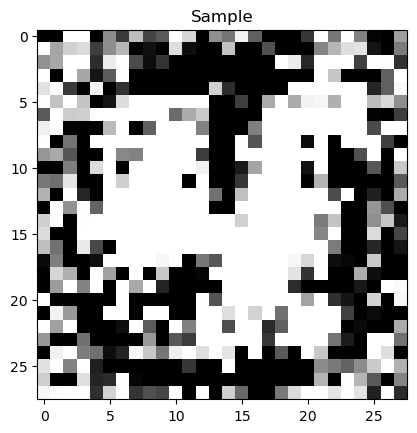

iteration number:  2000


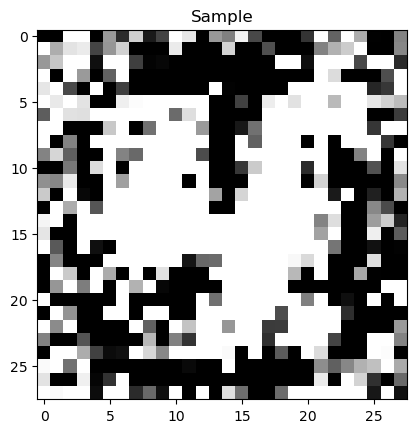

iteration number:  2500


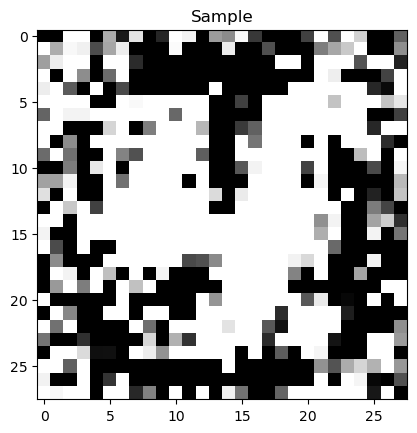

iteration number:  3000


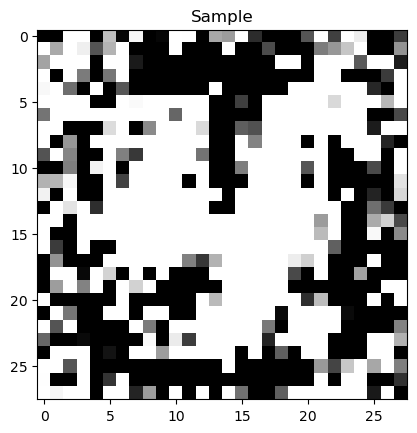

In [49]:
generate(starting_noise=data[0].unsqueeze(0), 
         class_name=4, 
         step_size=0.01, 
         iterations=3001, 
         print_freq=500)

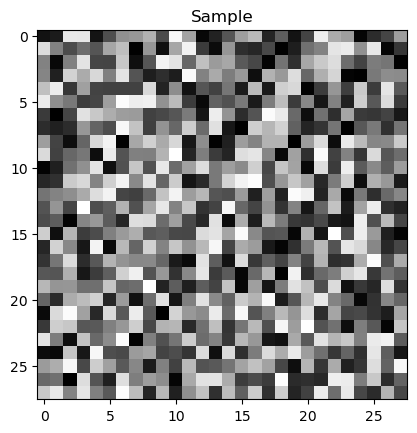

iteration number:  0


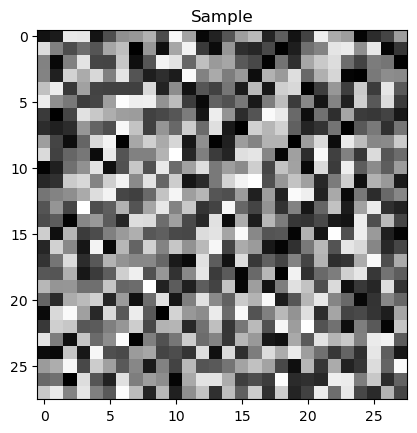

iteration number:  500


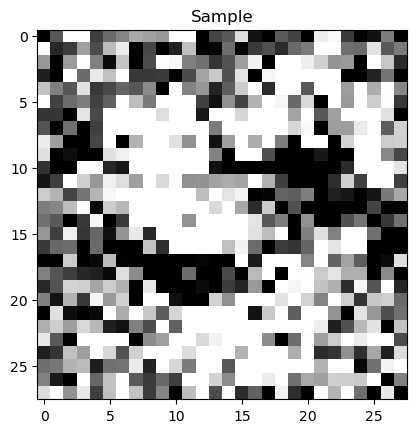

iteration number:  1000


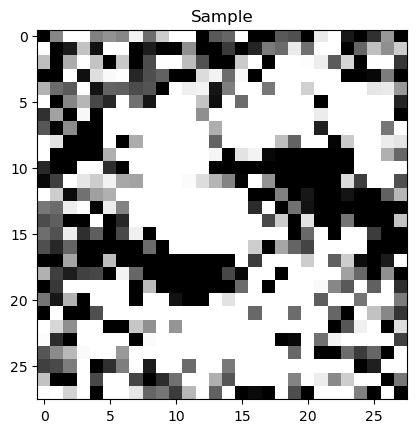

iteration number:  1500


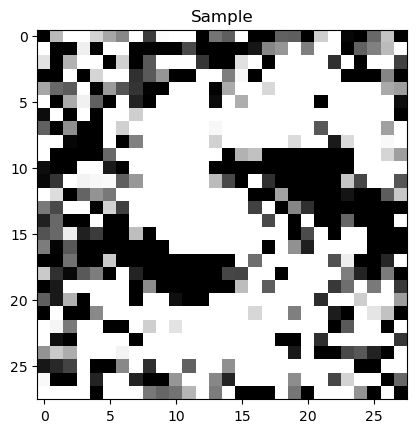

iteration number:  2000


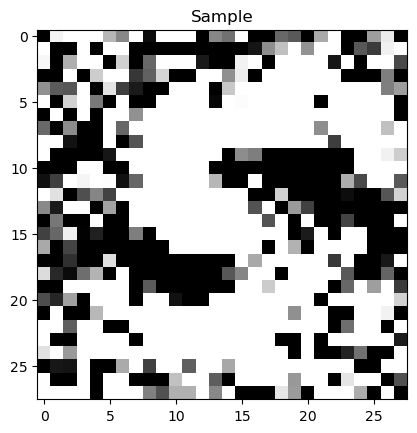

iteration number:  2500


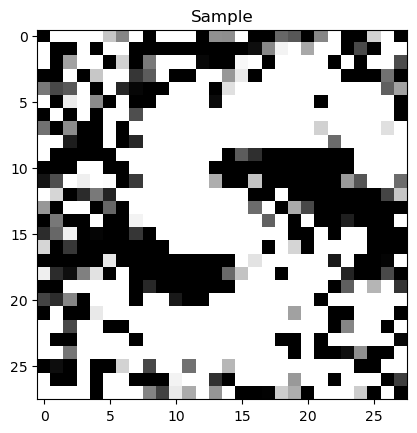

iteration number:  3000


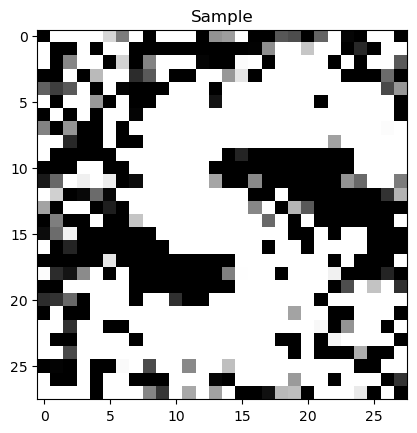

In [50]:
generate(starting_noise=data[0].unsqueeze(0), 
         class_name=5, 
         step_size=0.01, 
         iterations=3001, 
         print_freq=500)

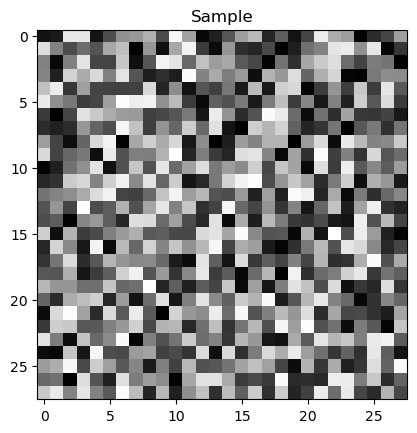

iteration number:  0


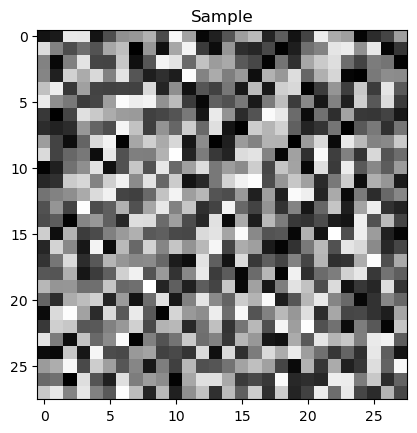

iteration number:  500


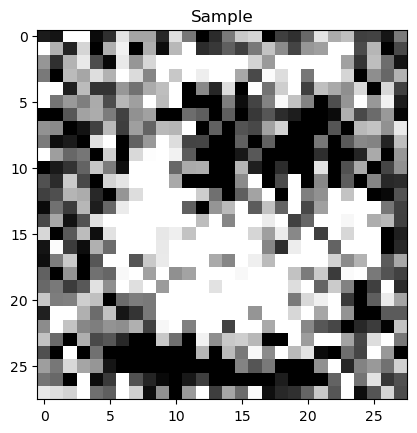

iteration number:  1000


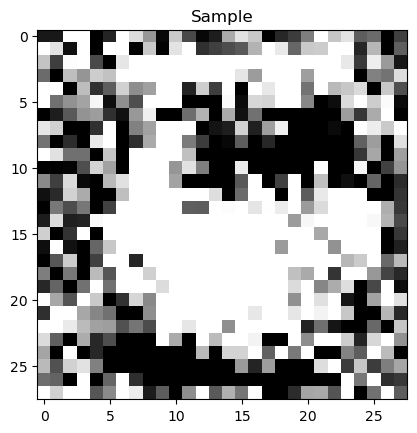

iteration number:  1500


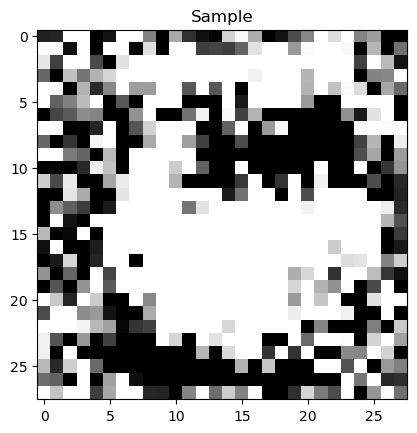

iteration number:  2000


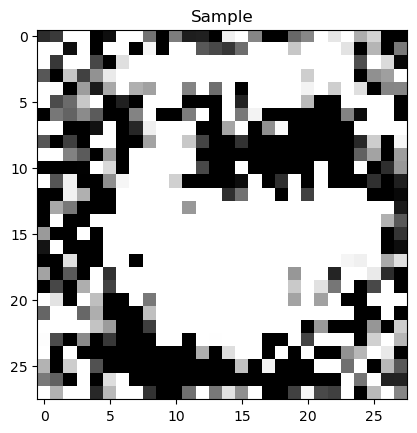

iteration number:  2500


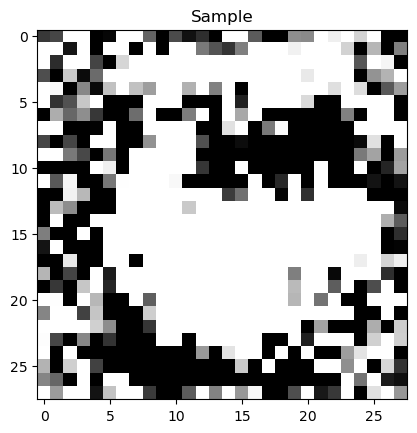

iteration number:  3000


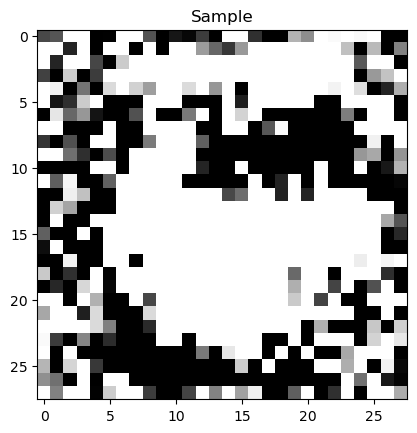

In [51]:
generate(starting_noise=data[0].unsqueeze(0), 
         class_name=6, 
         step_size=0.01, 
         iterations=3001, 
         print_freq=500)

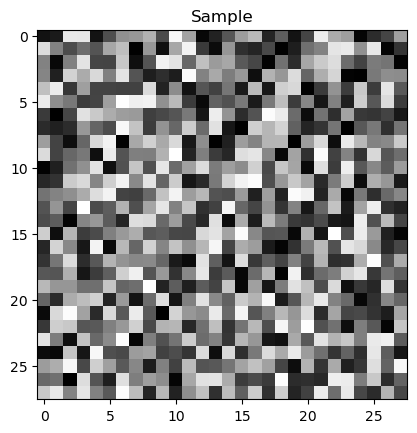

iteration number:  0


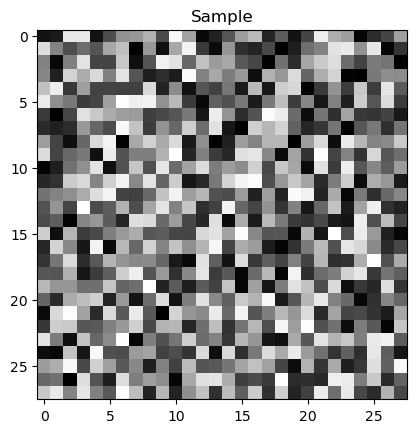

iteration number:  500


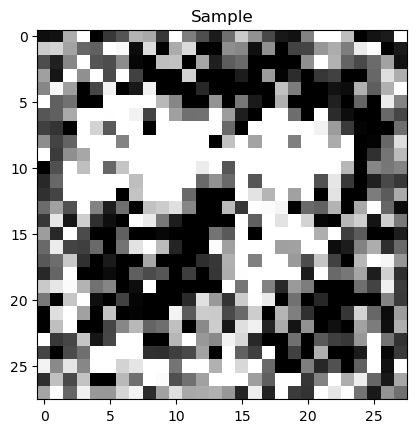

iteration number:  1000


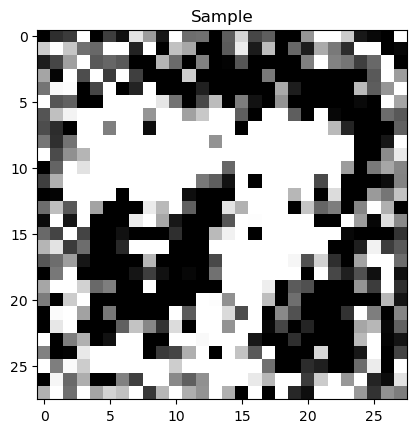

iteration number:  1500


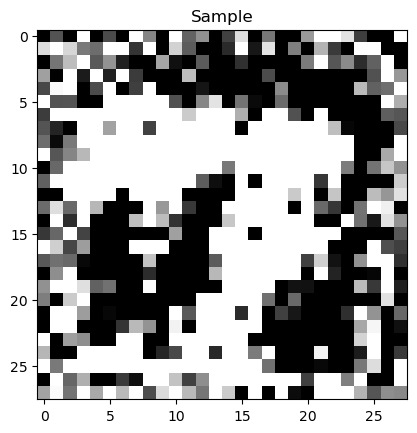

iteration number:  2000


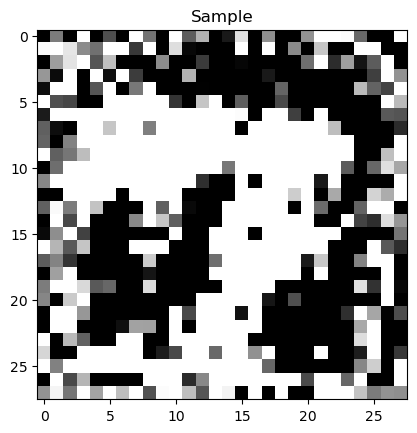

iteration number:  2500


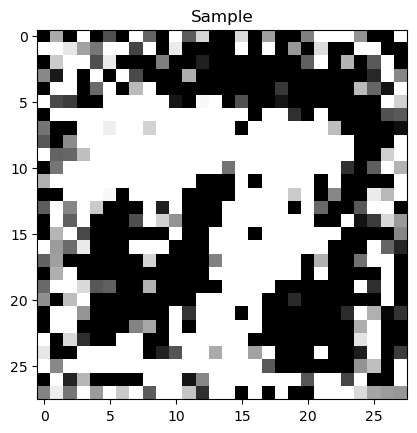

iteration number:  3000


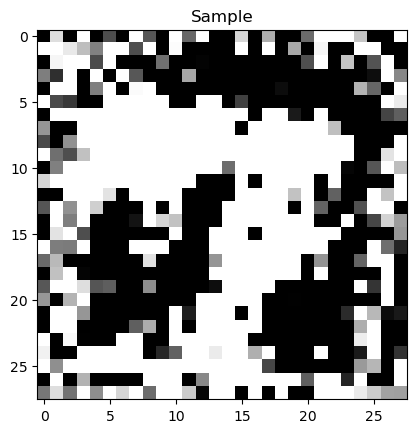

In [52]:
generate(starting_noise=data[0].unsqueeze(0), 
         class_name=7, 
         step_size=0.01, 
         iterations=3001, 
         print_freq=500)

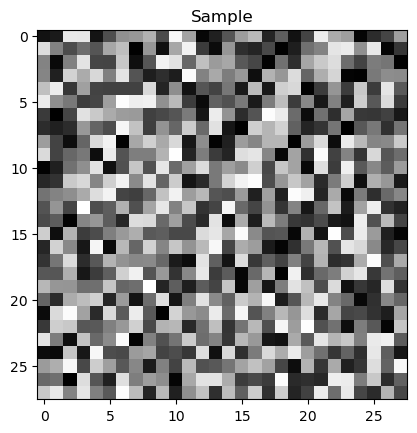

iteration number:  0


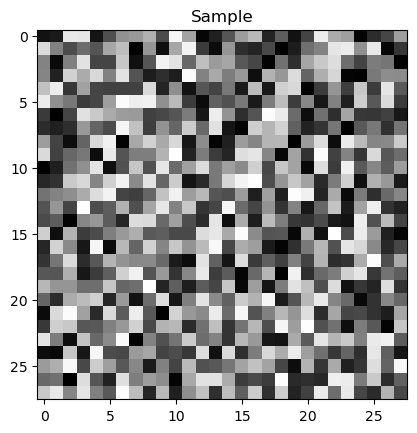

iteration number:  500


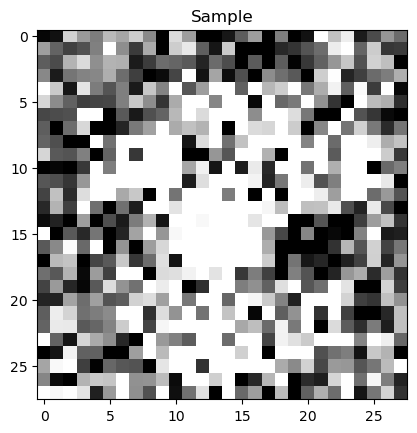

iteration number:  1000


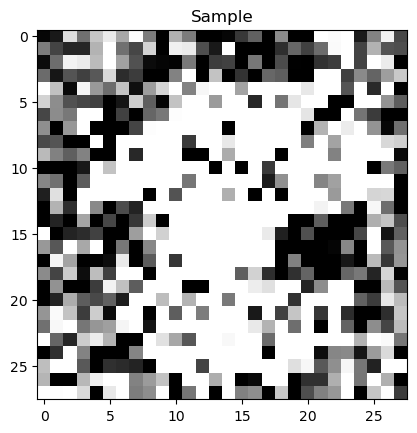

iteration number:  1500


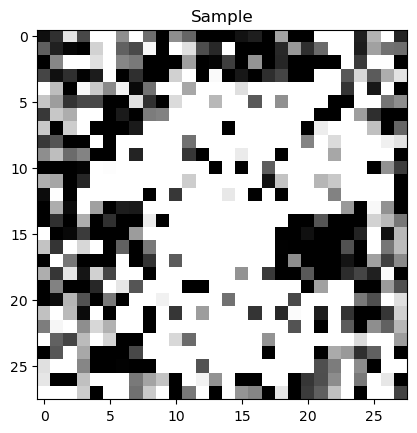

iteration number:  2000


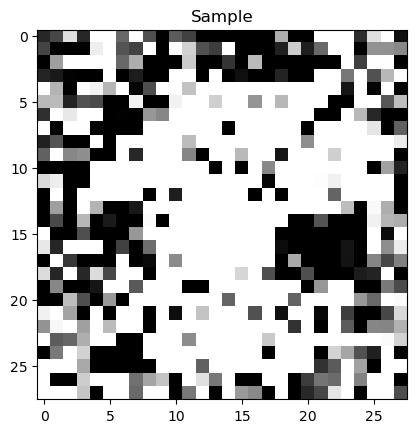

iteration number:  2500


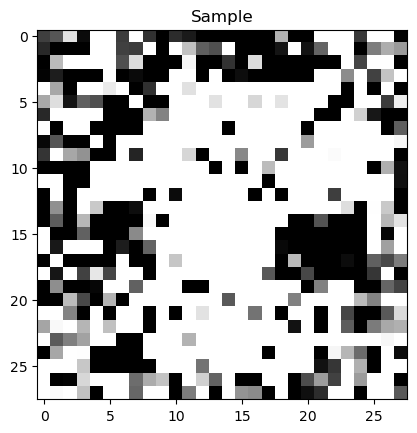

iteration number:  3000


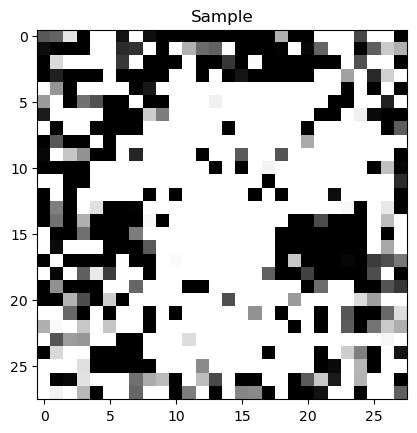

In [53]:
generate(starting_noise=data[0].unsqueeze(0), 
         class_name=8, 
         step_size=0.01, 
         iterations=3001, 
         print_freq=500)

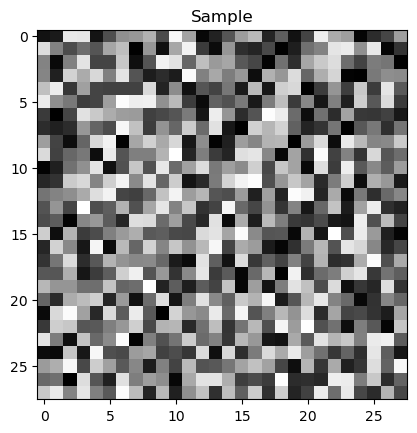

iteration number:  0


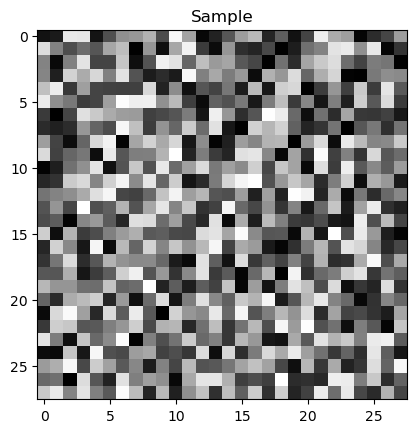

iteration number:  500


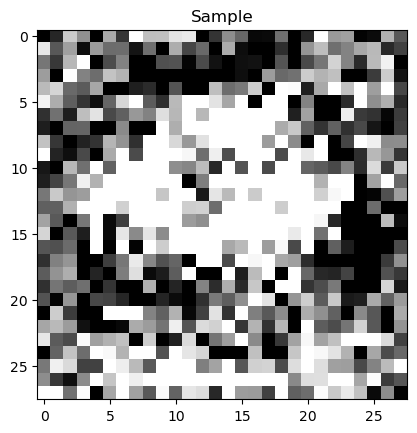

iteration number:  1000


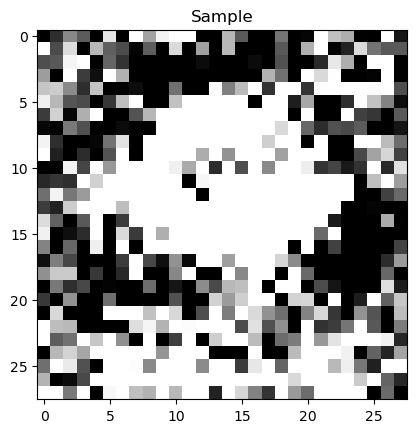

iteration number:  1500


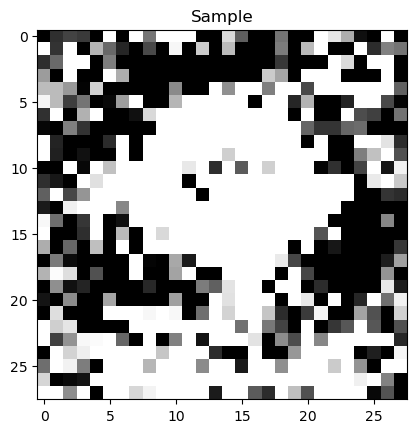

iteration number:  2000


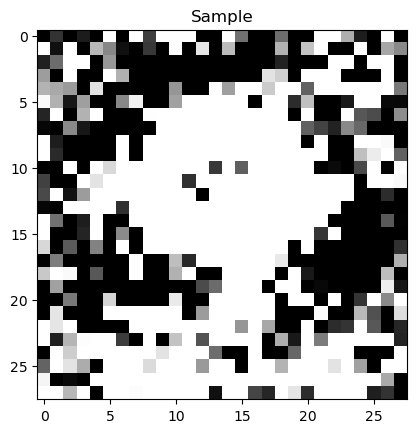

iteration number:  2500


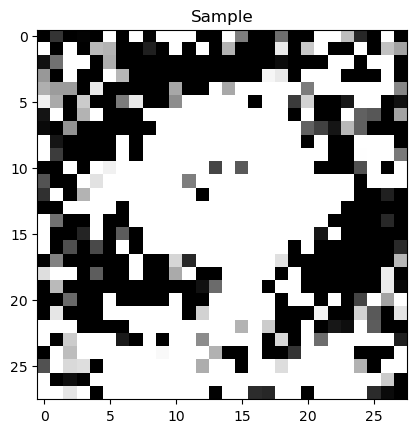

iteration number:  3000


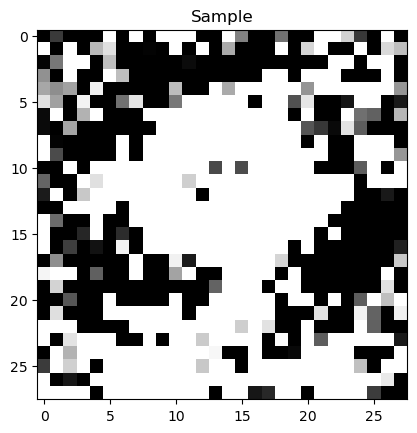

In [54]:
generate(starting_noise=data[0].unsqueeze(0), 
         class_name=9, 
         step_size=0.01, 
         iterations=3001, 
         print_freq=500)